# 1)Установка

In [ ]:
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
!pip install --upgrade tensorflow==2.5.0

--2022-12-04 16:28:51--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.199.20.126
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.199.20.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 430460776 (411M) [application/x-deb]
Saving to: ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb.1’

libcudnn8_8.1.0.77- 100%[===================>] 410.52M   160MB/s    in 2.6s    

2022-12-04 16:28:53 (160 MB/s) - ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb.1’ saved [430460776/430460776]

(Reading database ... 124015 files and directories currently installed.)
Preparing to unpack libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+cuda11.2) over (8.1.0.77-1+cuda11.2) ...
^C
lrwxrwxrwx 1 root root     17 Jan 25  2021 /usr/lib/x86_64-linux-gnu/libcudnn.so.8 -> libcudnn.so.8.1.0
-rw-r--r

In [ ]:
!wget https://pysource.com/extra_files/maskrcnn_colab_demo_commit_17.zip
!unzip maskrcnn_colab_demo_commit_17.zip
import os
import sys
sys.path.append("/content/maskrcnn_colab/mrcnn_demo")
from m_rcnn import *
%matplotlib inline

--2022-12-04 16:29:45--  https://pysource.com/extra_files/maskrcnn_colab_demo_commit_17.zip
Resolving pysource.com (pysource.com)... 188.114.96.0, 188.114.97.0, 2a06:98c1:3120::, ...
Connecting to pysource.com (pysource.com)|188.114.96.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59340 (58K) [application/zip]
Saving to: ‘maskrcnn_colab_demo_commit_17.zip.2’

maskrcnn_colab_demo 100%[===================>]  57.95K  --.-KB/s    in 0.004s  

2022-12-04 16:29:45 (13.4 MB/s) - ‘maskrcnn_colab_demo_commit_17.zip.2’ saved [59340/59340]

Archive:  maskrcnn_colab_demo_commit_17.zip
replace maskrcnn_colab/mrcnn_demo/config.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# 2)Загрузка фоток

In [ ]:
# эти 4 файлика надо закинуть в content в коллабе
train_images_path = "train.zip"
val_images_path = "val.zip"
train_annotations_path = "train_odna_model.json"
val_annotations_path = "val_odna_model.json"

# фотки из zip в папку 
extract_images(os.path.join("/content/",train_images_path), "/content/train")
extract_images(os.path.join("/content/",val_images_path), "/content/val")

Extracted: 146 images
Extracted: 45 images


In [ ]:
# для обучения нейронки
dataset_train = load_image_dataset(os.path.join("/content/", train_annotations_path), "/content/train", "train") 
dataset_val = load_image_dataset(os.path.join("/content/", val_annotations_path), "/content/val", "val")
class_number = dataset_train.count_classes() # количество классов (у нас только car)
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/train_odna_model.json
Annotation json path:  /content/val_odna_model.json
Train: 32
Validation: 5
Classes: 1


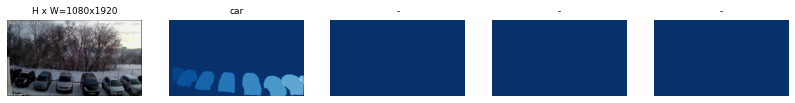

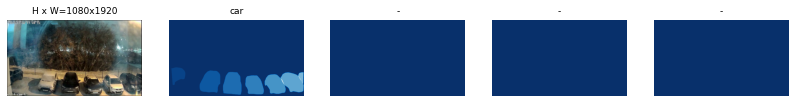

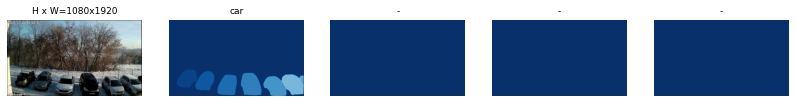

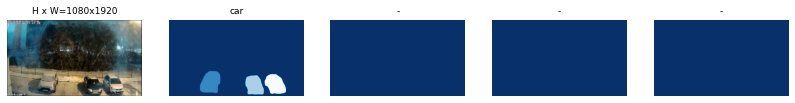

In [ ]:
display_image_samples(dataset_train)

# 3)Тренировка

In [ ]:
config = CustomConfig(class_number)
model = load_training_model(config)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


/content/maskrcnn_colab/mask_rcnn_coco.h5


In [ ]:
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/maskrcnn_colab/logs/object20221204T1522/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_mask_deconv  

KeyboardInterrupt: ignored

# 4)Проверка на выбранной фотке

In [37]:
from visualize import random_colors, get_mask_contours, draw_mask
# снова в папку content кидаем тестовую фотку
img = cv2.imread("/content/test.jpg")
test_model, inference_config = load_test_model(class_number)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r = test_model.detect([image])[0]
colors = random_colors(80)

Loading weights from  /content/maskrcnn_colab/logs/object20221204T1522/mask_rcnn_object_0002.h5
Re-starting from epoch 2


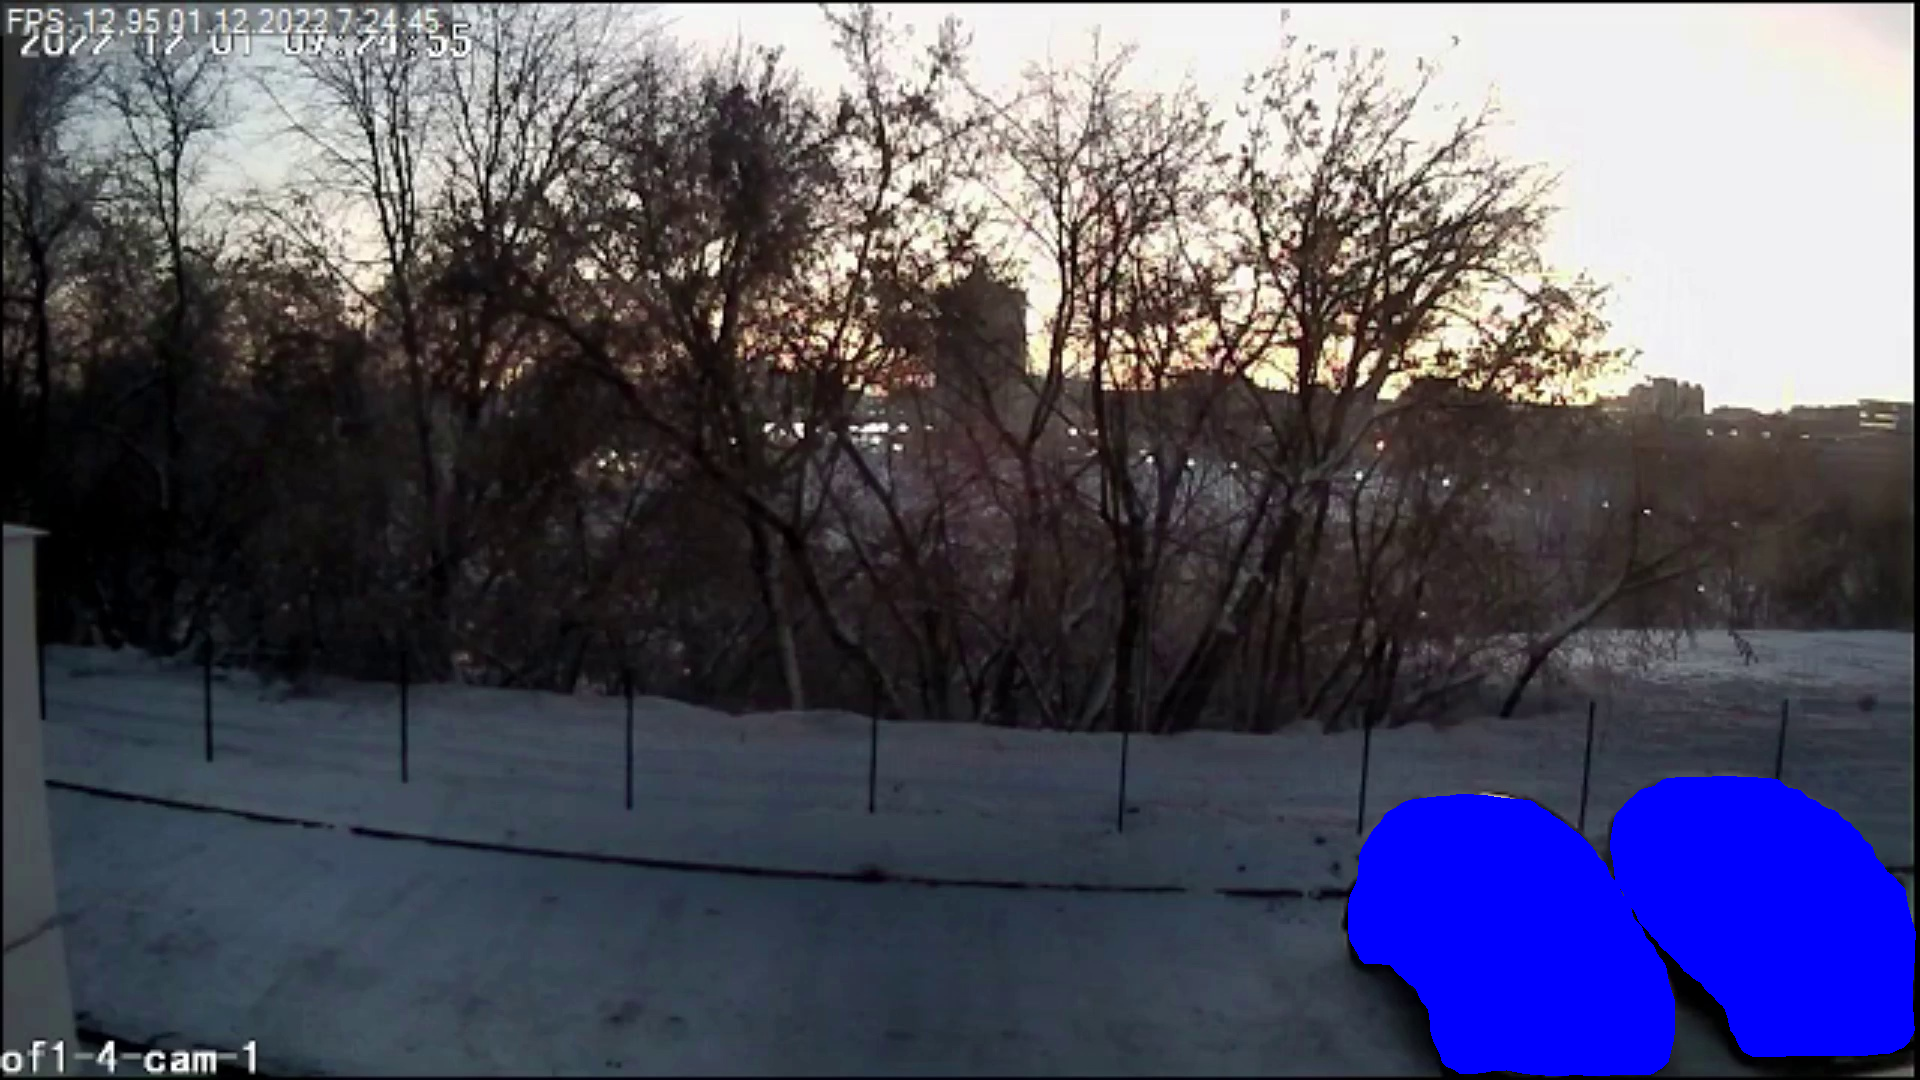

In [38]:
from google.colab.patches import cv2_imshow

object_count = len(r["class_ids"])
for i in range(object_count):
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, 255)
        img = draw_mask(img, [cnt], 255, 1) # 1 - альфа канал [0; 1]

cv2_imshow(img)

5. Вычисление

Ширина:1920
Свободные расстояния:  1347 1
Ширина автомобилей:  287 273


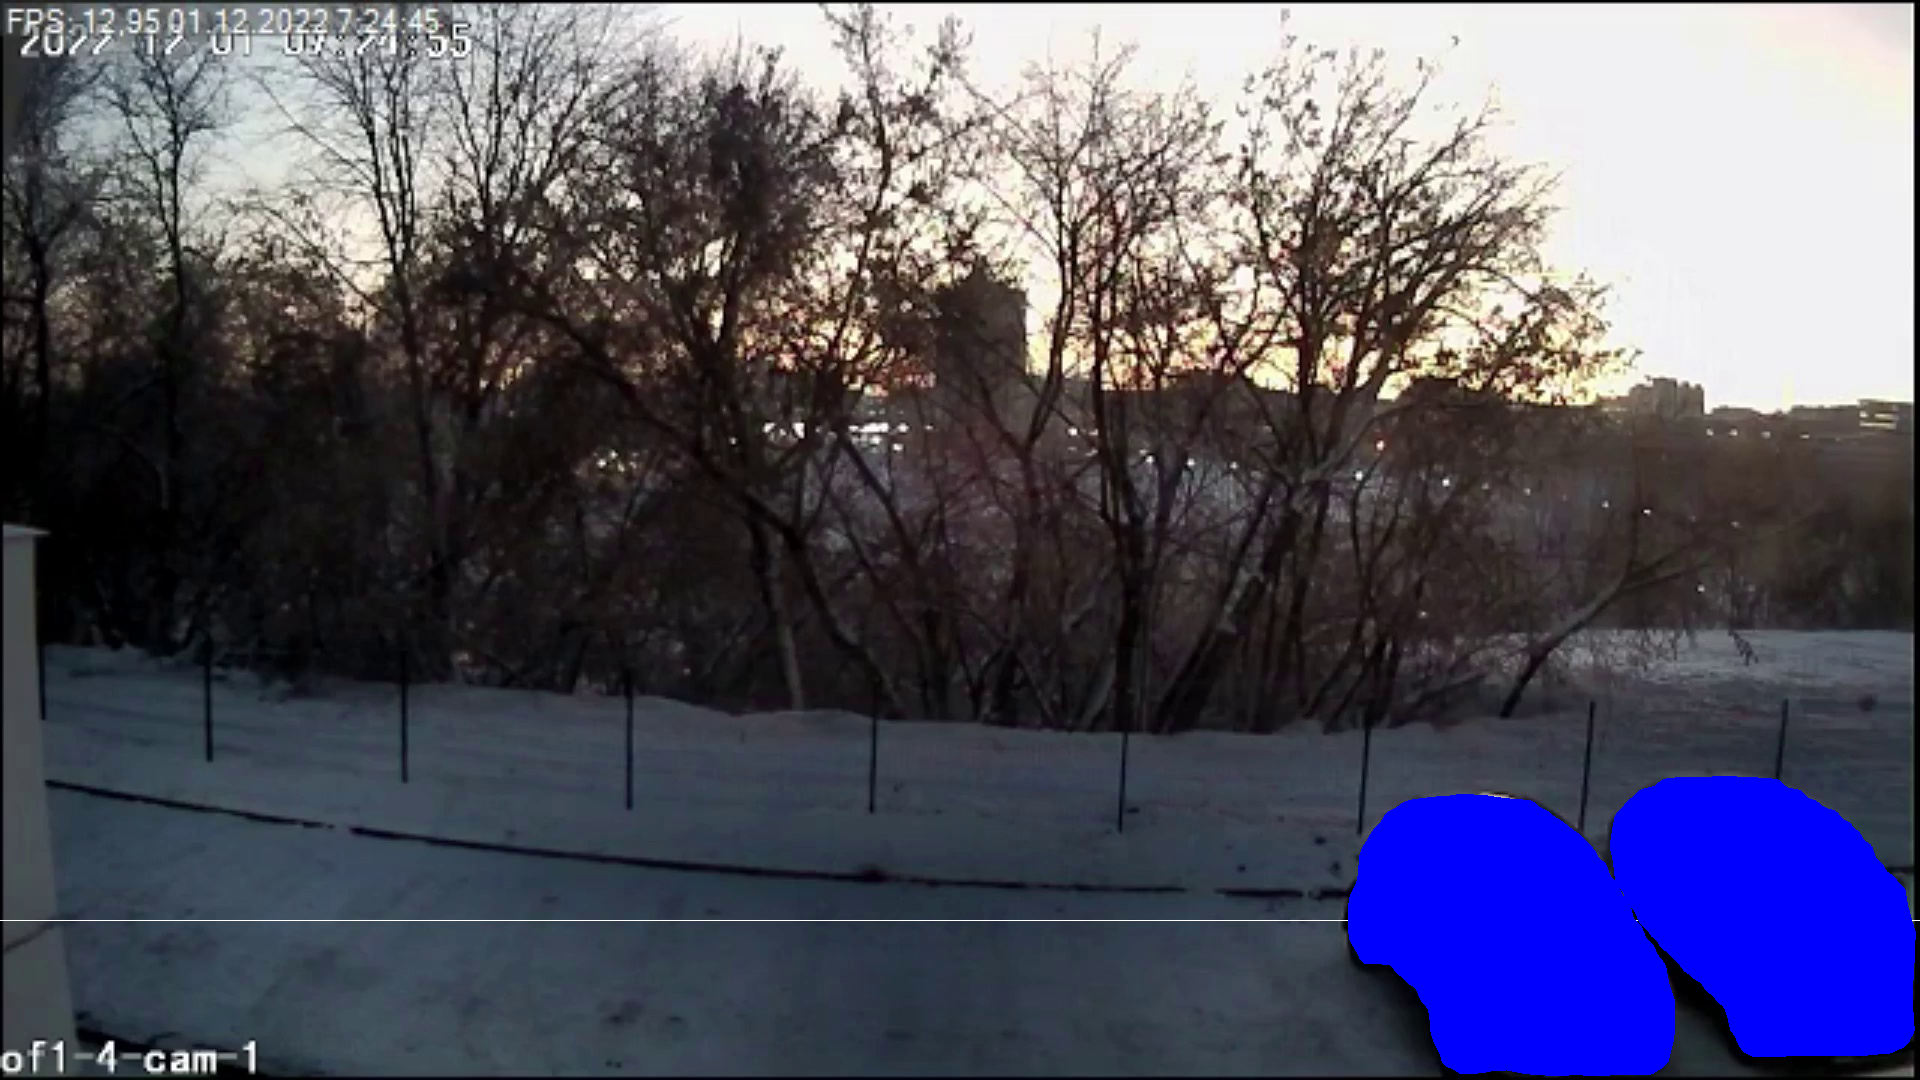

True


In [39]:
imgTemp = img.copy()

widthBeetweenCars = []
widthCars = []
carfl = False
rng = 0

print("Ширина:" + str(imgTemp.shape[1]))
for i in range(1920):
  if(imgTemp[920, i][0] != 255):
    imgTemp[920, i] = (255,255, 255)
    if carfl:
      carfl = False
      widthCars.append(i - rng - 1)
      rng = i
      
  elif not carfl: 
    carfl = True
    widthBeetweenCars.append(i - rng - 1)
    rng = i


# Расстояния в пикселях!
print('Свободные расстояния: ', *widthBeetweenCars)
print('Ширина автомобилей: ', *widthCars)

cv2_imshow(imgTemp)

# 8.15 mm at 1 pixel

cars = {"shcoda":2030,"nissan":1850,"suzuki":1770,"mitsubishi":1820,"citroen":1850,"toyota":1875,\
        "lada":1750,"vaz":1700,"mazda":1720}

# пользовательская машина
name = "shcoda"
if name in cars.keys():
  isFree = False
  for d in widthBeetweenCars:

    if cars[name] / 8.15 + 75 < d :
      isFree = True
      break
print(isFree)      



6. Проверка на забитые области

Loading weights from  /content/maskrcnn_colab/logs/object20221204T1522/mask_rcnn_object_0002.h5
Re-starting from epoch 2


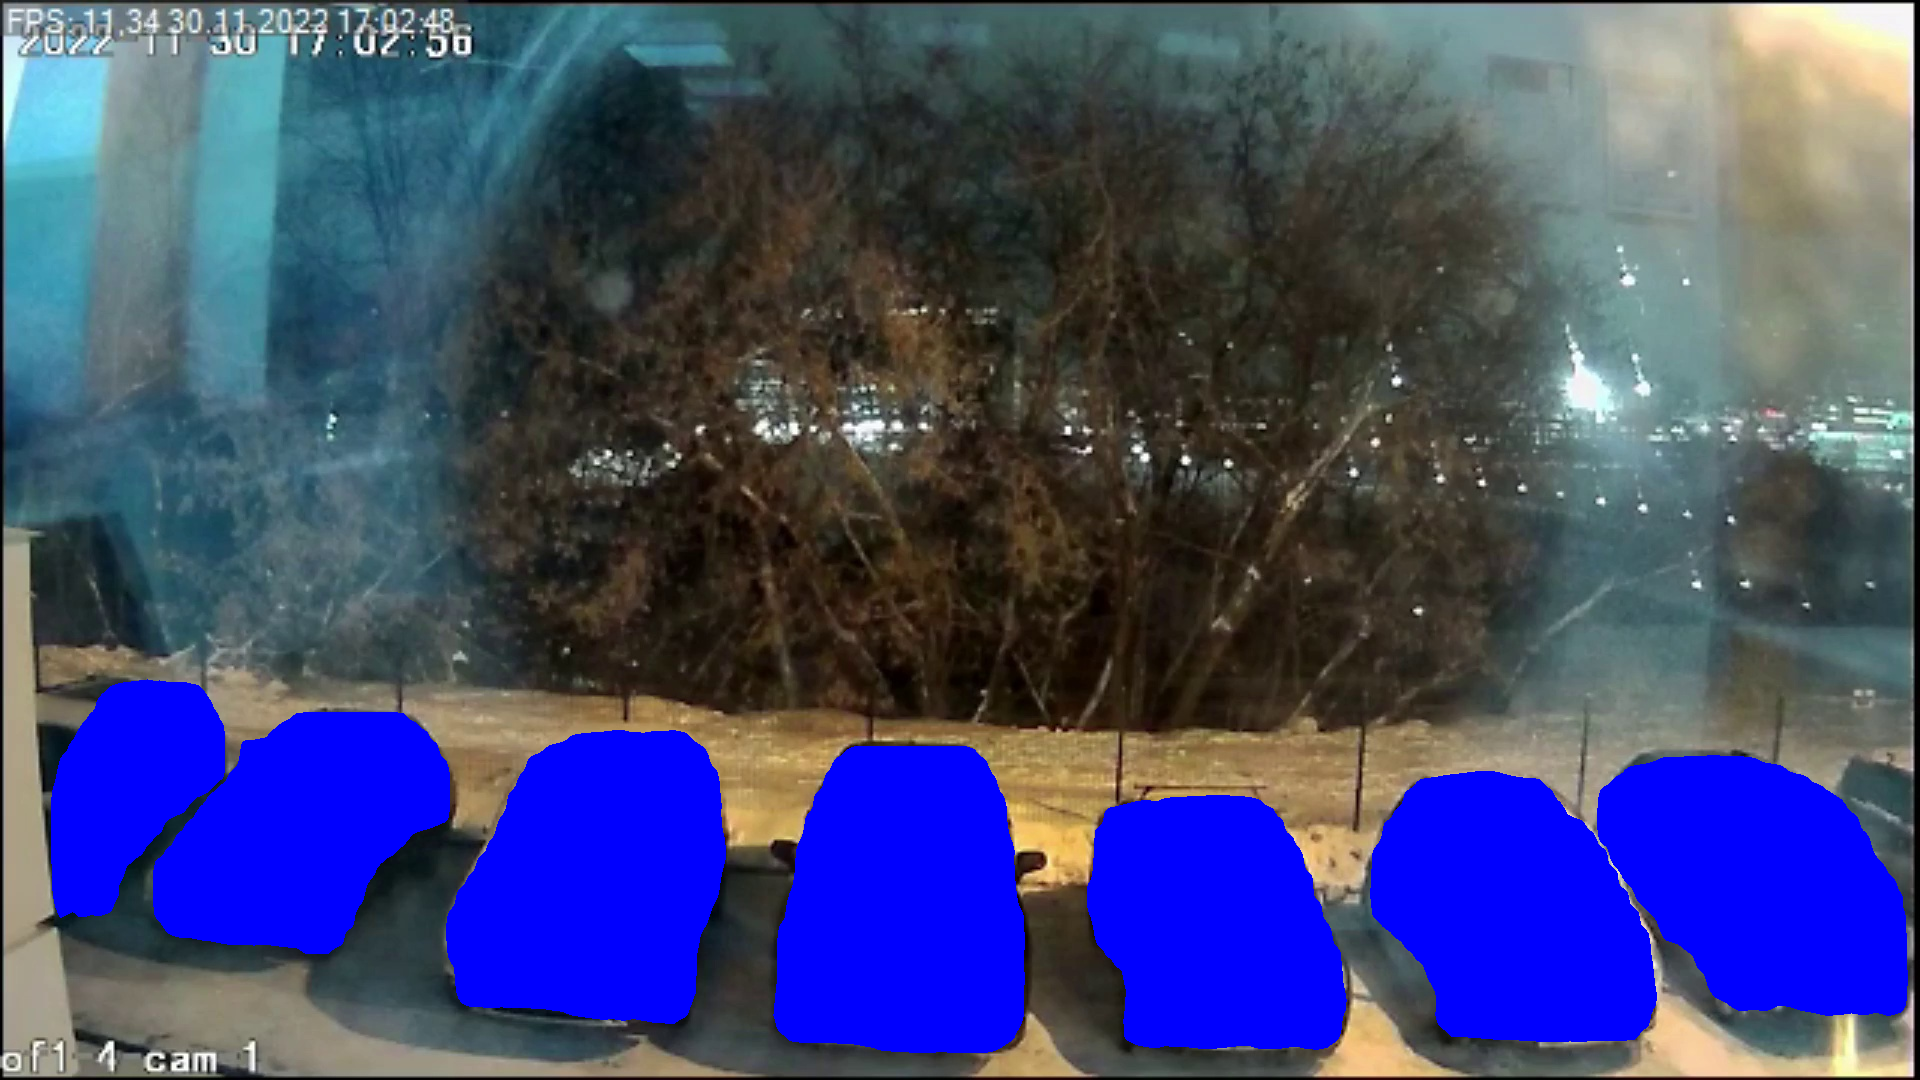

Ширина:1920
Свободные расстояния:  157 91 74 66 50 15
Ширина автомобилей:  196 260 240 234 262 249


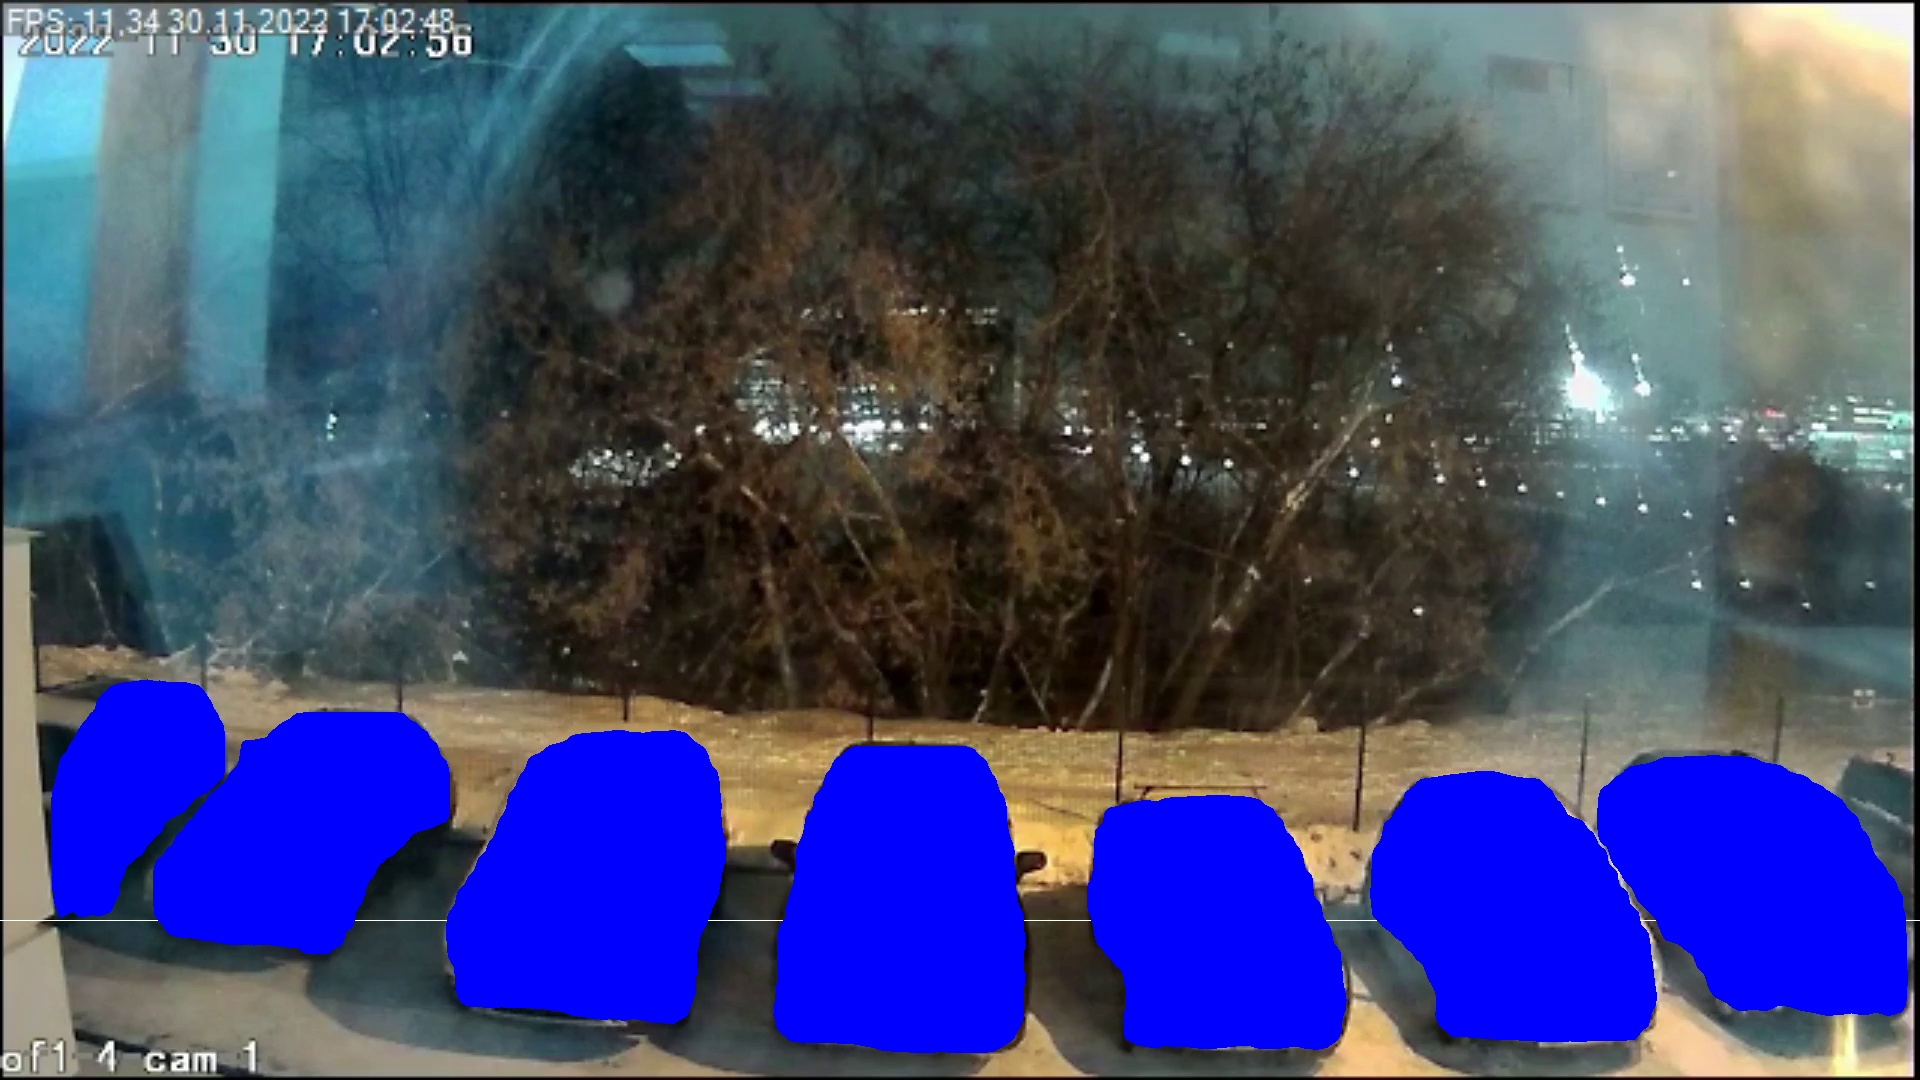

False


In [34]:
img = cv2.imread("/content/test0.jpg")
test_model, inference_config = load_test_model(class_number)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r = test_model.detect([image])[0]
colors = random_colors(80)


object_count = len(r["class_ids"])
for i in range(object_count):
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, 255)
        img = draw_mask(img, [cnt], 255, 1) # 1 - альфа канал [0; 1]

cv2_imshow(img)

imgTemp = img.copy()

widthBeetweenCars = []
widthCars = []
carfl = False
rng = 0

print("Ширина:" + str(imgTemp.shape[1]))
for i in range(1920):
  if(imgTemp[920, i][0] != 255):
    imgTemp[920, i] = (255,255, 255)
    if carfl:
      carfl = False
      widthCars.append(i - rng - 1)
      rng = i
      
  elif not carfl: 
    carfl = True
    widthBeetweenCars.append(i - rng - 1)
    rng = i


print('Свободные расстояния: ', *widthBeetweenCars)
print('Ширина автомобилей: ', *widthCars)

cv2_imshow(imgTemp)

cars = {"shcoda":2030,"nissan":1850,"suzuki":1770,"mitsubishi":1820,"citroen":1850,"toyota":1875,\
        "lada":1750,"vaz":1700,"mazda":1720}

name = "shcoda"
if name in cars.keys():
  isFree = False
  for d in widthBeetweenCars:

    if cars[name] / 8.15 + 75 < d:
      isFree = True
      break
print(isFree)      
